In [55]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('NYC_Restaurants.csv', dtype = str)
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


Q1. Create a unique name for each restaurant.

In [23]:
df['RESTAURANT'] = df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Q2. How many restaurants are included in the data?

In [24]:
restaurant_count = len(pd.unique(df['RESTAURANT']))
print(restaurant_count)
#There are 10114 unique restaurants in this data.

10114


[Q3] How many chains are there?

In [25]:
chain_count = df[['DBA','RESTAURANT', 'BUILDING' , 'STREET', 'ZIPCODE', 'BORO']].drop_duplicates()['DBA'].value_counts()
#print(chain_count)
chains = chain_count[chain_count >= 2]
print(chains)
print(len(chains)) ##There are 368 chains

SUBWAY                           144
MCDONALD'S                        79
STARBUCKS COFFEE                  74
DUNKIN' DONUTS                    69
DUNKIN DONUTS                     64
                                ... 
KENNEDY FRIED CHICKEN & PIZZA      2
MITOUSHI SUSHI                     2
EL POLLO INKA PERU                 2
PIZZA EXPRESS                      2
ARGO TEA CAFE                      2
Name: DBA, Length: 368, dtype: int64
368


Q4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

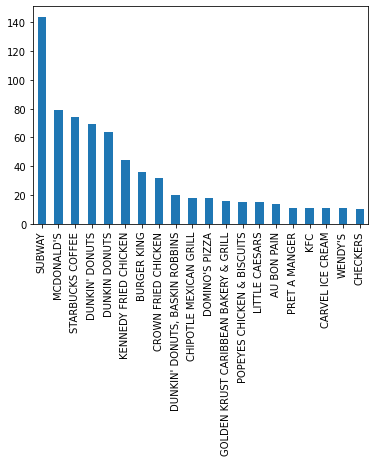

In [26]:
chains.iloc[:20].plot(kind = 'bar')

Q5. What fraction of all restaurants are chain restaurants? 

In [27]:
chain_fraction = sum(chains)/ restaurant_count
print(chain_fraction) #about %16.5 of restaurants are chains

0.16472216729286138


Q6.  Plot the number of non-chain restaurants in each
boro. 

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Name: BORO, dtype: int64

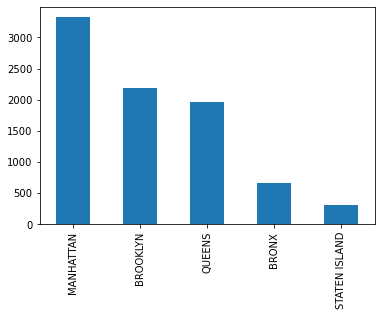

In [28]:
non_chains = chain_count[chain_count ==1 ]
non_chains_list = list(non_chains.index)

#now look through df to see which restaurants are in our non chain list

boro_non_chain = df[df['DBA'].isin(non_chains_list)][['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'BORO']].drop_duplicates()

nonchains_by_boro = boro_non_chain[boro_non_chain['BORO'] != "Missing"]['BORO'].value_counts()
nonchains_by_boro.plot(kind ="bar")
nonchains_by_boro

                                
                                

Q7. Plot the fraction of non-chain restaurants in each
boro

In [29]:
restaurants_by_boro = df[df['BORO'] != "Missing"][['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'BORO']].drop_duplicates()['BORO'].value_counts()
restaurants_by_boro

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Name: BORO, dtype: int64

In [30]:
restaurants_nonchain = pd.concat([nonchains_by_boro.rename('#_of_nonchain'),restaurants_by_boro.rename('#_of_resturants')], axis=1)
restaurants_nonchain

,#_of_nonchain,#_of_resturants
MANHATTAN,3323,4001
BROOKLYN,2180,2529
QUEENS,1968,2321
BRONX,659,855
STATEN ISLAND,312,394


<AxesSubplot:>

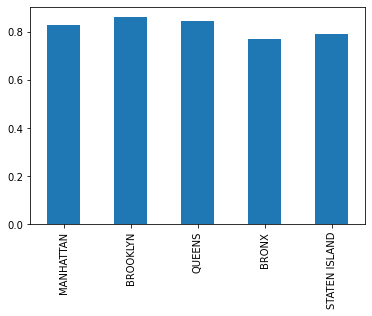

In [57]:
restaurants_nonchain['ratio'] =  restaurants_nonchain.iloc[:,0]/restaurants_nonchain.iloc[:,1]
restaurants_nonchain['ratio'].plot(kind = 'bar')

#The boro with the most independent restaurants(Manhattan) is not the one with the 
#highest ratio of independent restaurants(Brooklyn). 

Q8. Plot the popularity of cuisines.

<AxesSubplot:>

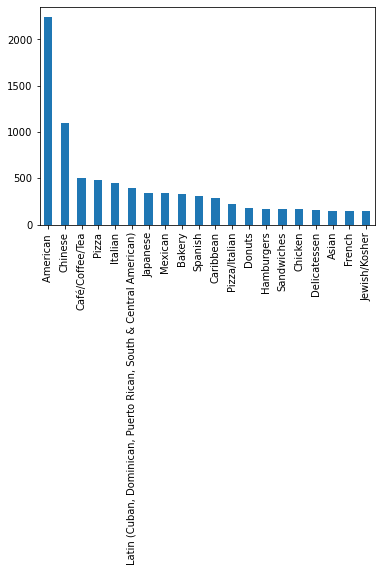

In [32]:
top_cuisines = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
top_cuisines.iloc[:20].plot(kind = 'bar')

Q9. Plot the cuisines among restaurants which never got
cited for violations.

In [33]:
Restaurants_Violation = df[df['VIOLATION CODE'].notnull()]['RESTAURANT'].unique()


clean_restaurants =  df[~df['RESTAURANT'].isin(Restaurants_Violation)].drop_duplicates('RESTAURANT')

print(len(clean_restaurants)) 

241


<AxesSubplot:>

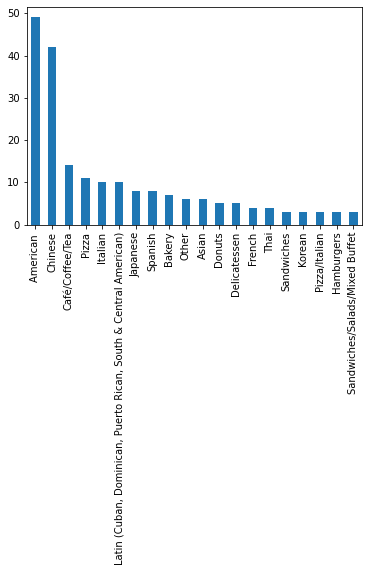

In [34]:
clean_cuisines = clean_restaurants['CUISINE DESCRIPTION'].value_counts()
clean_cuisines.iloc[:20].plot(kind= 'bar')

Q10. What cuisines tend to be the “cleanest”?

In [35]:
top_cuisine_20 = top_cuisines[top_cuisines > 20]
top_cuisine_20

American                                                            2238
Chinese                                                             1098
Café/Coffee/Tea                                                      498
Pizza                                                                483
Italian                                                              451
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     391
Japanese                                                             340
Mexican                                                              339
Bakery                                                               326
Spanish                                                              311
Caribbean                                                            287
Pizza/Italian                                                        217
Donuts                                                               176
Hamburgers                                         

In [36]:
ratio_clean = pd.concat([top_cuisine_20.rename("#_of_restaurants"),clean_cuisines.rename("#_of_nonviolation_restaurants")], axis=1)
ratio_clean = ratio_clean[ratio_clean['#_of_restaurants'].notnull()]
ratio_clean

,#_of_restaurants,#_of_nonviolation_restaurants
American,2238.0,49.0
Chinese,1098.0,42.0
Café/Coffee/Tea,498.0,14.0
Pizza,483.0,11.0
Italian,451.0,10.0
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",391.0,10.0
Japanese,340.0,8.0
Mexican,339.0,3.0
Bakery,326.0,7.0
Spanish,311.0,8.0


In [37]:
ratio_clean['ratio'] = ratio_clean['#_of_nonviolation_restaurants'] / ratio_clean['#_of_restaurants']
ratio_clean.sort_values(by = 'ratio', ascending = False).iloc[:10].index.values

array(['Soul Food', 'Vietnamese/Cambodian/Malaysia', 'Other',
       'Soups & Sandwiches', 'Continental', 'Barbecue', 'Asian',
       'Chinese', 'Greek', 'Peruvian'], dtype=object)

Q11. What are the most common violations in each borough?

In [38]:
#Create a table of the number of times each violation description was observed in each borough

#common_violations = df[['RESTAURANT','BORO','VIOLATION DESCRIPTION']].drop_duplicates()['VIOLATION DESCRIPTION'].value_counts()


b_v_crosstab = pd.crosstab(df['VIOLATION DESCRIPTION'],df[df['BORO'] != "Missing"]['BORO'])
b_v_crosstab.idxmax()



BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [39]:
violation_freq = df['VIOLATION DESCRIPTION'].value_counts()
violation_freq

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    6056
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                 4821
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                    3358
Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.                                

In [40]:
normalize_b_v = b_v_crosstab.divide(violation_freq, axis =0)
normalize_b_v

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.088889,0.296296,0.362963,0.214815,0.037037
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.058824,0.294118,0.352941,0.235294,0.058824
''''Wash hands sign not posted at hand wash facility.,0.087500,0.237500,0.387500,0.250000,0.033333
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.079365,0.190476,0.301587,0.380952,0.047619
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.069307,0.250825,0.323432,0.303630,0.052805
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,0.100000,0.150000,0.550000,0.150000,0.050000
Toilet facility used by women does not have at least one covered garbage receptacle.,0.062500,0.312500,0.437500,0.125000,0.062500
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",0.041667,0.166667,0.312500,0.416667,0.062500
Unprotected food re-served.,0.500000,0.000000,0.500000,0.000000,0.000000


In [41]:
normalize_b_v.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

Q13. How many phone area codes correspond to a single zipcode?

In [42]:

df['AREA CODE']= df['PHONE'].str[:3]

zip_count = df.groupby(df['AREA CODE'])['ZIPCODE'].nunique()
zip_count_1 = (df.groupby(df['AREA CODE'])['ZIPCODE'].nunique()== 1).value_counts()[True]

print(zip_count_1)
#34 area codes correspond to a single zip code

34


Q14. Find common misspellings of street names

In [43]:
def last_word(street):
    if len(street.split()) == 2:
        return street.split()[1]

In [44]:
df['STREET TYPE'] = df['STREET'].map(last_word)
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,AREA CODE,STREET TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44628,44628,50019095,EARLY,BROOKLYN,967,MANHATTAN AVE,11222,9177577831,Sandwiches/Salads/Mixed Buffet,01/29/2015,...,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,EARLY 967 MANHATTAN AVE 11222 BROOKLYN,917,AVE
44629,44629,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/30/2015,...,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Re-inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None
44630,44630,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,...,Evidence of mice or live mice present in facil...,Critical,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None
44631,44631,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,...,Facility not vermin proof. Harborage or condit...,Not Critical,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None


In [45]:
def first_word(street):
    if len(street.split()) >= 1:
        return street.split()[0]

In [46]:
df['STREET BASE'] = df['STREET'].map(first_word)
df.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,AREA CODE,STREET TYPE,STREET BASE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH


In [47]:
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,AREA CODE,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH,FLATBUSH 11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH,FLATBUSH 11225
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH,FLATBUSH 11225
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH,FLATBUSH 11225
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH,FLATBUSH 11225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44628,44628,50019095,EARLY,BROOKLYN,967,MANHATTAN AVE,11222,9177577831,Sandwiches/Salads/Mixed Buffet,01/29/2015,...,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,EARLY 967 MANHATTAN AVE 11222 BROOKLYN,917,AVE,MANHATTAN,MANHATTAN 11222
44629,44629,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/30/2015,...,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Re-inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None,E,E 10009
44630,44630,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,...,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None,E,E 10009
44631,44631,50019107,TESHIGOTOYA,MANHATTAN,432,E 13TH ST,10009,2127773174,Japanese,01/28/2015,...,35,NaN,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,TESHIGOTOYA 432 E 13TH ST 10009 MANHATTAN,212,None,E,E 10009


In [48]:
street = df[['STREET BASE & ZIP','STREET BASE','STREET TYPE']].drop_duplicates()
street

,STREET BASE & ZIP,STREET BASE,STREET TYPE
0,FLATBUSH 11225,FLATBUSH,AVENUE
5,63 11374,63,ROAD
9,ASTORIA 11369,ASTORIA,BOULEVARD
16,SUTTER 11208,SUTTER,AVENUE
22,KINGS 11223,KINGS,HIGHWAY
...,...,...,...
44587,BEDFORD 11249,BEDFORD,AVE
44593,NORFOLK 10002,NORFOLK,ST
44613,9TH 11101,9TH,ST
44617,ROGERS 11216,ROGERS,AVE


In [49]:
street_1 = street[street['STREET BASE'].notnull()]
street_1

,STREET BASE & ZIP,STREET BASE,STREET TYPE
0,FLATBUSH 11225,FLATBUSH,AVENUE
5,63 11374,63,ROAD
9,ASTORIA 11369,ASTORIA,BOULEVARD
16,SUTTER 11208,SUTTER,AVENUE
22,KINGS 11223,KINGS,HIGHWAY
...,...,...,...
44587,BEDFORD 11249,BEDFORD,AVE
44593,NORFOLK 10002,NORFOLK,ST
44613,9TH 11101,9TH,ST
44617,ROGERS 11216,ROGERS,AVE


In [50]:
merged_street = street_1.merge(street_1[['STREET BASE & ZIP','STREET TYPE']], on = 'STREET BASE & ZIP')
merged_street

,STREET BASE & ZIP,STREET BASE,STREET TYPE_x,STREET TYPE_y
0,FLATBUSH 11225,FLATBUSH,AVENUE,AVENUE
1,FLATBUSH 11225,FLATBUSH,AVENUE,AVE
2,FLATBUSH 11225,FLATBUSH,AVE,AVENUE
3,FLATBUSH 11225,FLATBUSH,AVE,AVE
4,63 11374,63,ROAD,ROAD
...,...,...,...,...
3244,PEARL 11201,PEARL,ST,ST
3245,LAFAYETTE 10301,LAFAYETTE,AVE,AVE
3246,GREENE 11216,GREENE,AVE,AVE
3247,9TH 11101,9TH,ST,ST


In [51]:
merged_street_diff = merged_street[merged_street['STREET TYPE_x'] != merged_street['STREET TYPE_y']]
merged_street_diff 

,STREET BASE & ZIP,STREET BASE,STREET TYPE_x,STREET TYPE_y
1,FLATBUSH 11225,FLATBUSH,AVENUE,AVE
2,FLATBUSH 11225,FLATBUSH,AVE,AVENUE
5,63 11374,63,ROAD,DRIVE
6,63 11374,63,DRIVE,ROAD
12,CHURCH 11218,CHURCH,AVENUE,AVE
...,...,...,...,...
3221,E 10457,E,None,None
3222,SAINT 10031,SAINT,None,None
3227,E 10021,E,None,None
3232,E 10472,E,None,None


In [52]:
street_crosstab = pd.crosstab(merged_street_diff['STREET TYPE_x'],merged_street_diff['STREET TYPE_y'])
street_crosstab

STREET TYPE_y,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEVARD,BULEVARD,C,...,SQUARE,ST,STATION,STREET,TPKE,TURNPIKE,U,V,X,Z
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,145,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
AVENUE,0,1,0,145,0,0,0,0,0,0,...,1,0,0,11,0,0,0,0,0,0
B,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
BLVD,0,0,0,0,0,0,0,42,1,0,...,0,0,0,0,0,0,0,0,0,0
BOULEVARD,0,0,0,0,0,0,42,0,1,0,...,0,0,0,0,0,0,0,0,0,0
BULEVARD,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
street_list = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']

street_mistakes_crosstab =street_crosstab[street_crosstab.index.isin(street_list)]
street_mistakes_crosstab

STREET TYPE_y,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEVARD,BULEVARD,C,...,SQUARE,ST,STATION,STREET,TPKE,TURNPIKE,U,V,X,Z
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
AVE,0,1,0,0,145,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
BULEVARD,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
PL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
RD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ST,0,0,0,2,0,0,0,0,0,0,...,0,0,0,90,0,0,0,0,0,0


In [54]:
street_mistakes_crosstab.idxmax(axis = 1)

STREET TYPE_x
AVE         AVENUE
BULEVARD      BLVD
PL           PLACE
RD            ROAD
ST          STREET
dtype: object